In [1]:
# Gauss Seidel

# x = 1
# y = 2
# z = 3

# 3x + y + z = 8
# x + 3y + z = 10
# x + y + 3z = 12

# x = (-y - z + 8)/3
# y = (-x - z + 10)/3
# z = (-x - y + 12)/3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Kasih 2 array
x = np.array([
    [3,1,1],
    [1,3,1],
    [1,1,3]
])
y = np.array(
    [8, 10, 12]
)

def gauss_seidel(x, y, tol=0.01):
    # Validasi diagonally dominant
    diag = np.array(np.diag(x))
    np.fill_diagonal(x, 0)
    nonDiag = np.sum(x, axis=1)

    if not np.all(diag > nonDiag):
        print("Not Diagonally Dominant")
        return

    # Mencari nilai x, y, z
    x = -x
    old_matrix = np.zeros(np.shape(x[0]))

    while True:
        new_matrix = np.array(old_matrix)
        for i, row in enumerate(x):
            new_matrix[i] = (y[i] + np.dot(new_matrix, row))/diag[i]
        
        err = np.sqrt(np.dot(new_matrix - old_matrix, new_matrix - old_matrix))
        if(err < tol):
            print(new_matrix)
            return
        old_matrix = new_matrix

gauss_seidel(x, y)


[0.99969073 1.9997941  3.00017172]


In [3]:
# Newton-Raphson
# Root Finding

# x**2 - 4

# xn+1 = x - f(x)/f'(x)

f = lambda x: x**2 - 4
df = lambda x: 2*x

def newton_raphson(f, df, x, tol=0.01):
    if(np.abs(f(x)) < tol):
        print("Akar dari persamaan: ", x)
        return
    
    newValue = x - f(x)/df(x)
    return newton_raphson(f, df, newValue)

newton_raphson(f, df, 5)

Akar dari persamaan:  2.0000051812194735


In [4]:
# Riemann Integral

def f(x):
    return 3*x**2 + 2*x + 7

a = 3   # Lower Limit
b = 7   # Upper Limit

n = 10  # 10 titik, 9 kotak

x = np.linspace(a, b, n)
y = f(x)

lebar_kotak = (b-a)/(n-1)

# plt.plot(x, y, "o")

leftRiemann = lebar_kotak * sum(y[0:n-1])
rightRiemann = lebar_kotak * sum(y[1:n])

x_mid = (x[0:n-1] + x[1:n])/2
y_mid = f(x_mid)

midRiemann = lebar_kotak * sum(y_mid)

trapezoid = (y[0] + y[n-1] + 2*sum(y[1:n-1])) * lebar_kotak / 2

print("Left Riemann: ", leftRiemann)
print("Right Riemann: ", rightRiemann)
print("Mid Riemann: ", midRiemann)
print("Trapezoid: ", trapezoid)

Left Riemann:  355.9506172839506
Right Riemann:  412.83950617283944
Mid Riemann:  383.8024691358024
Trapezoid:  384.395061728395


[[1.7]
 [0.7]]
[[1.7]
 [0.7]]


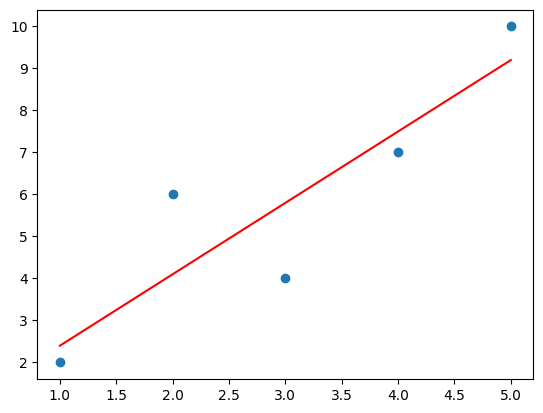

In [5]:
# Least Square Regression

x = [1, 2, 3, 4, 5]
y = [2, 6, 4, 7, 10]

x = np.array(x)
y = np.array(y)

A = np.vstack((x, np.ones(len(x)))).T
y = y[:, np.newaxis]

# Direct Inverse
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
print(alpha)

plt.plot(x, y, "o")
plt.plot(x, alpha[0]*x + alpha[1], "r")

# Pseudo-inverse
pseudoinverse = np.linalg.pinv(A)
alpha_pseudo = np.dot(pseudoinverse, y)
print(alpha_pseudo)